# 유무임 승하차 현황

In [1]:
import pandas as pd

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [2]:
# 데이터 로드
df_group = pd.read_csv('./무임승차_대상별_현황_2016-2021.csv', encoding='cp949')
df_fares = pd.read_csv('./서울시 지하철 호선별 역별 유_무임 승하차 인원 정보.csv', encoding='cp949')

## 1. 무임승차_대상별_현황_2016-2021

### 1. 데이터 확인 및 전처리

In [3]:
df_group.head()

,운영기관별(1),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,...,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,...,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
1,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),...,무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
2,합계,431540,564065,345012,450692,80733,105766,5500,7233,296,...,380197,510236,315412,423193,60463,81260,3855,5168,467,615
3,서울교통공사,-,-,-,-,-,-,-,-,-,...,205748,278438,170771,231108,32868,44477,2109,2853,-,-
4,서울메트로,151738,206478,121979,165984,27736,37741,2023,2753,-,...,-,-,-,-,-,-,-,-,-,-


In [4]:
# 기존의 합계 column 삭제
df_group.drop(index=2, inplace=True)

In [5]:
# 결측치 처리('-' -> 0으로 변경)
df_group.replace('-', 0, inplace=True)

In [6]:
for i in df_group.columns:
    # 불필요한 columns 삭제
    if (df_group[i][0] == '계'):
        df_group.drop(columns=i, inplace=True)
    else:
        # column 이름 변경
        if i == '운영기관별(1)':
            df_group.rename(columns={i : '년도'}, inplace=True)
        df_group.rename(columns={i : i.split('.')[0]}, inplace=True)

In [7]:
df_group.iloc[0,0] = '대상'
df_group.iloc[1,0] = '인원/비용'
df_group

,년도,2016,2016,2016,2016,2016,2016,2016,2016,2017,...,2020,2020,2021,2021,2021,2021,2021,2021,2021,2021
0,대상,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,노인,...,기타,기타,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
1,인원/비용,무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),...,무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
3,서울교통공사,0,0,0,0,0,0,0,0,208466,...,0,0,170771,231108,32868,44477,2109,2853,0,0
4,서울메트로,121979,165984,27736,37741,2023,2753,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,서울특별시 도시철도공사,81162,109756,20278,27436,1473,1992,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,서울메트로 9호선(주),9337,11671,2534,3167,166,207,0,0,9746,...,16,20,8655,10819,1877,2346,133,166,17,21
7,서울교통공사9호선운영부문,987,1234,226,283,18,23,2,4,1103,...,0,0,3118,3897,485,606,186,233,0,0
8,부산교통공사,72059,91450,14535,18446,963,1222,0,0,77631,...,0,0,67718,92284,11502,15675,789,1075,0,0
9,대구도시철도공사,33297,36654,7034,7743,394,434,0,0,36211,...,0,0,30933,38666,5540,6924,269,337,0,0
10,인천교통공사,9498,11873,3137,3921,141,176,0,0,14109,...,0,0,14077,19004,3583,4838,134,180,0,0


In [8]:
# 년도별 데이터로 분리
df_group_2016 = df_group[['년도' ,'2016']].T
df_group_2016.reset_index(inplace=True)
df_group_2016.columns = df_group_2016.iloc[0]
df_group_2016.drop(index=0, inplace=True)

df_group_2017 = df_group[['년도' ,'2017']].T
df_group_2017.reset_index(inplace=True)
df_group_2017.columns = df_group_2017.iloc[0]
df_group_2017.drop(index=0, inplace=True)

df_group_2018 = df_group[['년도' ,'2018']].T
df_group_2018.reset_index(inplace=True)
df_group_2018.columns = df_group_2018.iloc[0]
df_group_2018.drop(index=0, inplace=True)

df_group_2019 = df_group[['년도' ,'2019']].T
df_group_2019.reset_index(inplace=True)
df_group_2019.columns = df_group_2019.iloc[0]
df_group_2019.drop(index=0, inplace=True)

df_group_2020 = df_group[['년도' ,'2020']].T
df_group_2020.reset_index(inplace=True)
df_group_2020.columns = df_group_2020.iloc[0]
df_group_2020.drop(index=0, inplace=True)

df_group_2021 = df_group[['년도' ,'2021']].T
df_group_2021.reset_index(inplace=True)
df_group_2021.columns = df_group_2021.iloc[0]
df_group_2021.drop(index=0, inplace=True)

In [9]:
# 분리한 데이터 병합
df_group = pd.concat([df_group_2016, df_group_2017, df_group_2018, df_group_2019, df_group_2020, df_group_2021], ignore_index=True)
df_group

,년도,대상,인원/비용,서울교통공사,서울메트로,서울특별시 도시철도공사,서울메트로 9호선(주),서울교통공사9호선운영부문,부산교통공사,대구도시철도공사,인천교통공사,광주광역시 도시철도공사,대전교통공사,부산-김해 경전철(주),의정부 경량전철(주),용인 경량전철(주),우이 신설경전철(주),김포골드라인(주)
0,2016,노인,무임승차 (천명),0,121979,81162,9337,987,72059,33297,9498,4830,6823,0,3244,1796,0,0
1,2016,노인,무임비용 (백만원),0,165984,109756,11671,1234,91450,36654,11873,6206,8880,0,4380,2604,0,0
2,2016,장애인,무임승차 (천명),0,27736,20278,2534,226,14535,7034,3137,1031,1736,974,988,524,0,0
3,2016,장애인,무임비용 (백만원),0,37741,27436,3167,283,18446,7743,3921,1323,2307,1306,1333,760,0,0
4,2016,국가유공자,무임승차 (천명),0,2023,1473,166,18,963,394,141,72,114,77,41,18,0,0
5,2016,국가유공자,무임비용 (백만원),0,2753,1992,207,23,1222,434,176,93,148,104,55,26,0,0
6,2016,기타,무임승차 (천명),0,0,0,0,2,0,0,0,0,287,0,0,7,0,0
7,2016,기타,무임비용 (백만원),0,0,0,0,4,0,0,0,0,360,0,0,10,0,0
8,2017,노인,무임승차 (천명),208466,0,0,9746,1103,77631,36211,14109,5092,7081,0,3556,2001,1195,0
9,2017,노인,무임비용 (백만원),283059,0,0,12182,1379,103710,45264,19047,6936,9176,0,4801,2901,1494,0


In [10]:
# 타입 확인
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   년도             48 non-null     object
 1   대상             48 non-null     object
 2   인원/비용          48 non-null     object
 3   서울교통공사         48 non-null     object
 4   서울메트로          48 non-null     object
 5   서울특별시 도시철도공사   48 non-null     object
 6   서울메트로 9호선(주)   48 non-null     object
 7   서울교통공사9호선운영부문  48 non-null     object
 8   부산교통공사         48 non-null     object
 9   대구도시철도공사       48 non-null     object
 10  인천교통공사         48 non-null     object
 11  광주광역시 도시철도공사   48 non-null     object
 12  대전교통공사         48 non-null     object
 13  부산-김해 경전철(주)   48 non-null     object
 14  의정부 경량전철(주)    48 non-null     object
 15  용인 경량전철(주)     48 non-null     object
 16  우이 신설경전철(주)    48 non-null     object
 17  김포골드라인(주)      48 non-null     object
dtypes: object(18)
memory usage: 6.9+

In [11]:
# 자료값을 정수형으로 변환
for i in df_group.columns[3:]:
    df_group[i] = df_group[i].astype('int')
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   년도             48 non-null     object
 1   대상             48 non-null     object
 2   인원/비용          48 non-null     object
 3   서울교통공사         48 non-null     int32 
 4   서울메트로          48 non-null     int32 
 5   서울특별시 도시철도공사   48 non-null     int32 
 6   서울메트로 9호선(주)   48 non-null     int32 
 7   서울교통공사9호선운영부문  48 non-null     int32 
 8   부산교통공사         48 non-null     int32 
 9   대구도시철도공사       48 non-null     int32 
 10  인천교통공사         48 non-null     int32 
 11  광주광역시 도시철도공사   48 non-null     int32 
 12  대전교통공사         48 non-null     int32 
 13  부산-김해 경전철(주)   48 non-null     int32 
 14  의정부 경량전철(주)    48 non-null     int32 
 15  용인 경량전철(주)     48 non-null     int32 
 16  우이 신설경전철(주)    48 non-null     int32 
 17  김포골드라인(주)      48 non-null     int32 
dtypes: int32(15), object(3)
memory u

In [12]:
# 합계 column 생성
df_group['합계'] = df_group[df_group.columns[3:]].sum(axis=1)
df_group.head(2)

,년도,대상,인원/비용,서울교통공사,서울메트로,서울특별시 도시철도공사,서울메트로 9호선(주),서울교통공사9호선운영부문,부산교통공사,대구도시철도공사,인천교통공사,광주광역시 도시철도공사,대전교통공사,부산-김해 경전철(주),의정부 경량전철(주),용인 경량전철(주),우이 신설경전철(주),김포골드라인(주),합계
0,2016,노인,무임승차 (천명),0,121979,81162,9337,987,72059,33297,9498,4830,6823,0,3244,1796,0,0,345012
1,2016,노인,무임비용 (백만원),0,165984,109756,11671,1234,91450,36654,11873,6206,8880,0,4380,2604,0,0,450692


In [13]:
# 2016~2021 무임승차 인구수(단위 : 천명)
df_group_pop = df_group[df_group.index % 2 == 0].drop(columns='인원/비용')
df_group_pop.tail(3)

,년도,대상,서울교통공사,서울메트로,서울특별시 도시철도공사,서울메트로 9호선(주),서울교통공사9호선운영부문,부산교통공사,대구도시철도공사,인천교통공사,광주광역시 도시철도공사,대전교통공사,부산-김해 경전철(주),의정부 경량전철(주),용인 경량전철(주),우이 신설경전철(주),김포골드라인(주),합계
42,2021,장애인,32868,0,0,1877,485,11502,5540,3583,670,1105,706,783,438,571,335,60463
44,2021,국가유공자,2109,0,0,133,186,789,269,134,37,64,46,30,15,23,20,3855
46,2021,기타,0,0,0,17,0,0,0,0,197,239,0,5,5,2,2,467


In [14]:
# 2016~2021 무임비용(단위 : 백만원)
df_group_fare = df_group[df_group.index % 2 == 1].drop(columns='인원/비용')
df_group_fare.tail(3)

,년도,대상,서울교통공사,서울메트로,서울특별시 도시철도공사,서울메트로 9호선(주),서울교통공사9호선운영부문,부산교통공사,대구도시철도공사,인천교통공사,광주광역시 도시철도공사,대전교통공사,부산-김해 경전철(주),의정부 경량전철(주),용인 경량전철(주),우이 신설경전철(주),김포골드라인(주),합계
43,2021,장애인,44477,0,0,2346,606,15675,6924,4838,939,1461,1012,1214,635,714,419,81260
45,2021,국가유공자,2853,0,0,166,233,1075,337,180,51,83,67,47,22,29,25,5168
47,2021,기타,0,0,0,21,0,0,0,0,276,299,0,7,7,2,3,615


### 2. 전국 무임승차 이용객 분석

#### 무임승차 이용객

In [15]:
# 년도별 무임승차 이용객 수
df_group_pop_year = df_group_pop.groupby(['년도'])[['합계']].sum()
df_group_pop_year.reset_index(inplace=True)

# 전국 대상별 무임승차 인원 합계
df_group_pop_target = df_group_pop.groupby(['대상'])[['합계']].sum()
df_group_pop_target.reset_index(inplace=True)

Text(0.5, 1.0, '대상별 무임승차 이용객 비율')

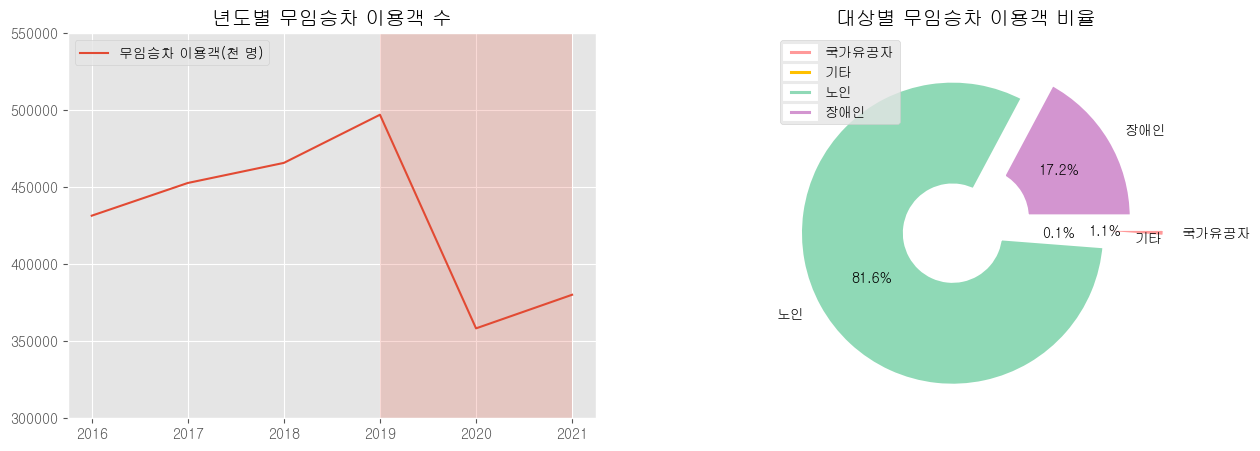

In [16]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(df_group_pop_year['년도'], df_group_pop_year['합계'], label='무임승차 이용객(천 명)')
ax1.set_ylim(300000, 550000)
ax1.legend(loc='upper left')
ax1.axvspan(3, 5,  facecolor='#e24a33', alpha=0.2) # 코로나 기간
ax1.set_title('년도별 무임승차 이용객 수')

ax2.pie(df_group_pop_target['합계'], labels = df_group_pop_target['대상'], autopct='%.1f%%', startangle=0, counterclock=False, 
        explode=[0.3, 0, 0.1, 0.1], colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'],
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
ax2.legend(loc='upper left')
ax2.set_title('대상별 무임승차 이용객 비율')

#### 해석
- 무임승차를 하는 이용객은 대다수가 노령자와 장애인으로 이루어짐을 알 수 있다.
- 무임승차 이용객은 시간이 지날수록 증가하는 추세를 보여왔다. 
- 하지만 붉은색으로 표시한 부분을 보면 알 수 있듯이 코로나의 발생 직후 급감하는 모습을 보인다. 이는 코로나의 여파로 전체적인 이용수 감소에 따른 일시적인 현상으로 유추된다. 왜냐하면 with코로나 이후 지하철 이용객이 증가함에 따라 소폭 증가하는 양상을 볼 수 있었기 때문이다.
- 보다 정확한 분석을 위해서는 지하철 이용객 수의 유임승차와 무임승차에 대한 비율 변화를 확인할 필요가 있다.

#### 년도별 총 무임비용 액수

In [17]:
# 년도별 무임비용 합계
df_group_fare = df_group_fare.groupby('년도')[['합계']].sum()
df_group_fare.reset_index(inplace=True)

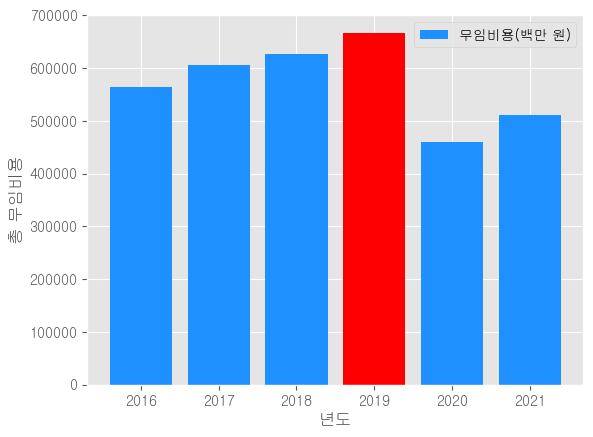

In [18]:
colors = ['dodgerblue', 'dodgerblue', 'dodgerblue', 'red', 'dodgerblue', 'dodgerblue']
plt.bar(df_group_fare['년도'], df_group_fare['합계'], label='무임비용(백만 원)', color=colors)
plt.xlabel('년도')
plt.ylabel('총 무임비용')
plt.legend(loc='upper right')
plt.show()

## 1. 서울시 지하철 호선별 역별 유_무임 승하차 인원 정보

### 데이터 확인 및 전처리

In [19]:
df_fares.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202212,1호선,서울역,1350791,196523,1316828,187268,20230103
1,202212,1호선,시청,672846,96623,665583,93198,20230103
2,202212,1호선,종각,975925,150911,949944,141309,20230103
3,202212,1호선,종로3가,490967,309071,450017,287432,20230103
4,202212,1호선,종로5가,476315,247835,470710,238588,20230103


In [20]:
df_fares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     57394 non-null  int64 
 1   호선명     57394 non-null  object
 2   지하철역    57394 non-null  object
 3   유임승차인원  57394 non-null  int64 
 4   무임승차인원  57394 non-null  int64 
 5   유임하차인원  57394 non-null  int64 
 6   무임하차인원  57394 non-null  int64 
 7   작업일자    57394 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 3.5+ MB


In [21]:
# 사용월의 타입변경(int -> str)
df_fares['사용월'] = df_fares['사용월'].astype('str')

# 17~22년을 제외한 데이터 삭제
df_fares.drop(df_fares[(df_fares['사용월'] < '201701') | (df_fares['사용월'] >= '202201')].index, axis=0, inplace=True)

In [22]:
# 필요없는 column 삭제
df_fares.drop(['작업일자'], axis=1, inplace=True)

In [23]:
# 중복데이터 확인
df_fares[df_fares.duplicated(df_fares.columns)]

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원
25762,201907,경강선,부발,50393,7281,47675,6980
25763,201907,경강선,경기광주,191098,28644,177103,29313
25764,201907,경강선,판교,119237,13987,119981,11269
25766,201907,경강선,신둔도예촌,31196,6564,29260,6369
25767,201907,경강선,세종대왕릉,6399,3355,6422,3395
...,...,...,...,...,...,...,...
36310,201803,중앙선,아신,17851,5963,18001,5895
36311,201803,중앙선,덕소,152670,52622,152150,52489
36312,201803,중앙선,망우,190694,72413,186142,73853
36313,201803,중앙선,구리,347445,87692,365874,89084


In [24]:
# 중복제거
df_fares.drop_duplicates(df_fares.columns, keep = 'first', inplace=True)

In [25]:
df_fares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35611 entries, 7968 to 44383
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     35611 non-null  object
 1   호선명     35611 non-null  object
 2   지하철역    35611 non-null  object
 3   유임승차인원  35611 non-null  int64 
 4   무임승차인원  35611 non-null  int64 
 5   유임하차인원  35611 non-null  int64 
 6   무임하차인원  35611 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.2+ MB


In [26]:
df_fares.호선명.unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선', '9호선2단계'],
      dtype=object)

- 1호선 전처리

In [27]:
# 1호선 역 이름 확인
df_fares[(df_fares['호선명'] == '1호선') | (df_fares['호선명'] == '경원선') | (df_fares['호선명'] == '경부선') | (df_fares['호선명'] == '경인선') | (df_fares['호선명'] == '장항선')].지하철역.unique()

array(['서울역', '제기동', '종각', '종로3가', '종로5가', '청량리(서울시립대입구)', '신설동', '동대문',
       '시청', '동묘앞', '독산', '금천구청', '신길', '송탄', '화서', '진위', '용산', '서동탄',
       '세류', '병점', '광명', '관악', '대방', '평택', '명학', '당정', '오산대', '평택지제',
       '오산', '가산디지털단지', '천안', '안양', '남영', '서정리', '금정', '석수', '수원', '의왕',
       '세마', '군포', '직산', '성균관대', '노량진', '두정', '성환', '영등포', '신도림', '구로',
       '보산', '도봉산', '양주', '가능', '방학', '한남', '소요산', '서빙고', '이촌(국립중앙박물관)',
       '덕정', '망월사', '창동', '석계', '광운대', '동두천중앙', '녹천', '동두천', '녹양', '덕계',
       '옥수', '응봉', '의정부', '외대앞', '왕십리(성동구청)', '신이문', '회룡', '월계', '지행',
       '도봉', '제물포', '도화', '동암', '중동', '개봉', '소사', '인천', '오류동', '간석', '부개',
       '도원', '동인천', '온수(성공회대입구)', '부천', '부평', '백운', '주안', '역곡', '송내',
       '구일', '아산', '온양온천', '탕정', '신창(순천향대)', '배방', '쌍용(나사렛대)', '봉명', '지제'],
      dtype=object)

In [28]:
# 1호선 역의 개수 확인
df_fares[(df_fares['호선명'] == '1호선') | (df_fares['호선명'] == '경원선') | (df_fares['호선명'] == '경부선') | (df_fares['호선명'] == '경인선') | (df_fares['호선명'] == '장항선')].지하철역.nunique()

105

In [29]:
# 다르게 표기된 역 이름 수정(지제 -> 평택지제)
df_fares.replace('지제', '평택지제', inplace=True)

In [30]:
# 잘못된 호선 수정
df_fares.loc[(df_fares['지하철역'] == '청량리(서울시립대입구)') & (df_fares['호선명'] == '경원선'), '호선명'] = '중앙선'
df_fares.loc[(df_fares['지하철역'] == '이촌(국립중앙박물관)') & (df_fares['호선명'] == '경원선'), '호선명'] = '중앙선'
df_fares.loc[(df_fares['지하철역'] == '왕십리(성동구청)') & (df_fares['호선명'] == '경원선'), '호선명'] = '중앙선'
df_fares.loc[(df_fares['지하철역'] == '옥수') & (df_fares['호선명'] == '경원선'), '호선명'] = '중앙선'
df_fares.loc[(df_fares['지하철역'] == '한남') & (df_fares['호선명'] == '경원선'), '호선명'] = '중앙선'
df_fares.loc[(df_fares['지하철역'] == '응봉') & (df_fares['호선명'] == '경원선'), '호선명'] = '중앙선'
df_fares.loc[(df_fares['지하철역'] == '서빙고') & (df_fares['호선명'] == '경원선'), '호선명'] = '중앙선'

In [31]:
# 중복일이 있는지 확인
print(df_fares[(df_fares['지하철역'].str.contains('지제'))].사용월.count())
print(df_fares[(df_fares['지하철역'].str.contains('청량리')) & (df_fares['호선명'] == '중앙선')].사용월.count())
print(df_fares[(df_fares['지하철역'].str.contains('이촌')) & (df_fares['호선명'] == '중앙선')].사용월.count())
print(df_fares[(df_fares['지하철역'].str.contains('왕십리')) & (df_fares['호선명'] == '중앙선')].사용월.count())
print(df_fares[(df_fares['지하철역'].str.contains('옥수')) & (df_fares['호선명'] == '중앙선')].사용월.count())
print(df_fares[(df_fares['지하철역'].str.contains('한남')) & (df_fares['호선명'] == '중앙선')].사용월.count())
print(df_fares[(df_fares['지하철역'].str.contains('응봉')) & (df_fares['호선명'] == '중앙선')].사용월.count())
print(df_fares[(df_fares['지하철역'].str.contains('서빙고')) & (df_fares['호선명'] == '중앙선')].사용월.count())

60
60
60
60
60
60
60
60


In [32]:
df_fares[(df_fares['호선명'] == '1호선') | (df_fares['호선명'] == '경원선') | (df_fares['호선명'] == '경부선') | (df_fares['호선명'] == '경인선') | (df_fares['호선명'] == '장항선')].지하철역.nunique()

98

In [33]:
# 회기역이 중앙선으로 빠짐
df_fares.loc[(df_fares['지하철역'].str.contains('회기'))].호선명.unique()

array(['중앙선'], dtype=object)

In [34]:
# '경원선', '경부선', '경인선', '장항선' -> 1호선
df_fares.replace(['경원선', '경부선', '경인선', '장항선'], '1호선', inplace=True)

- 2호선 전처리

In [35]:
# 2호선 역 이름 확인
df_fares[(df_fares['호선명'] == '2호선')].지하철역.unique()

array(['한양대', '영등포구청', '양천구청', '뚝섬', '당산', '아현', '대림(구로구청)', '종합운동장',
       '잠실새내', '서초', '방배', '잠실나루', '왕십리(성동구청)', '삼성(무역센터)', '교대(법원.검찰청)',
       '이대', '을지로4가', '용답', '충정로(경기대입구)', '동대문역사문화공원(DDP)', '성수', '신정네거리',
       '신설동', '문래', '낙성대(강감찬)', '을지로입구', '강변(동서울터미널)', '홍대입구', '강남',
       '도림천', '구의(광진구청)', '을지로3가', '시청', '신촌', '신림', '신대방', '잠실(송파구청)',
       '봉천', '서울대입구(관악구청)', '역삼', '건대입구', '합정', '선릉', '용두(동대문구청)', '신당',
       '구로디지털단지', '신도림', '사당', '상왕십리', '신답', '낙성대', '동대문역사문화공원'],
      dtype=object)

In [36]:
# 2호선 역의 개수 확인
df_fares[(df_fares['호선명'] == '2호선')].지하철역.nunique()

52

In [37]:
# 다르게 표기된 역 이름 수정
df_fares.replace('낙성대(강감찬)', '낙성대', inplace=True)
df_fares.replace('동대문역사문화공원(DDP)', '동대문역사문화공원', inplace=True)

In [38]:
# 중복일이 있는지 확인
print(df_fares[(df_fares['지하철역'].str.contains('낙성대')) & (df_fares['호선명'] == '2호선')].사용월.count())
print(df_fares[(df_fares['지하철역'].str.contains('동대문역사')) & (df_fares['호선명'] == '2호선')].사용월.count())

60
60


In [39]:
# 수정된 역의 개수 확인
df_fares[(df_fares['호선명'] == '2호선')].지하철역.nunique()

50

- 3호선 전처리

In [40]:
# 3호선 역 이름 확인
df_fares[(df_fares['호선명'] == '3호선') | (df_fares['호선명'] == '일산선')].지하철역.unique()

array(['대청', '충무로', '오금', '학여울', '가락시장', '대치', '동대입구', '경찰병원', '잠원', '도곡',
       '매봉', '무악재', '일원', '을지로3가', '약수', '종로3가', '안국', '구파발', '옥수', '압구정',
       '고속터미널', '금호', '양재(서초구청)', '불광', '수서', '경복궁(정부서울청사)', '녹번', '연신내',
       '신사', '홍제', '교대(법원.검찰청)', '남부터미널(예술의전당)', '독립문', '지축', '삼송', '정발산',
       '주엽', '화정', '원당', '대화', '백석', '마두', '원흥', '대곡'], dtype=object)

In [41]:
# 3호선 역의 개수 확인
df_fares[(df_fares['호선명'] == '3호선') | (df_fares['호선명'] == '일산선')].지하철역.nunique()

44

In [42]:
# '일산선' -> 3호선
df_fares.replace('일산선', '3호선', inplace=True)

- 4호선 전처리

In [43]:
# 4호선 역 이름 확인
df_fares[(df_fares['호선명'] == '4호선') | (df_fares['호선명'] == '안산선') | (df_fares['호선명'] == '과천선')].지하철역.unique()

array(['남태령', '동작(현충원)', '삼각지', '명동', '신용산', '동대문', '창동', '노원',
       '이촌(국립중앙박물관)', '총신대입구(이수)', '사당', '혜화', '길음', '쌍문', '숙대입구(갈월)',
       '미아(서울사이버대학)', '수유(강북구청)', '당고개', '한성대입구(삼선교)', '서울역', '충무로',
       '회현(남대문시장)', '동대문역사문화공원', '미아사거리', '성신여대입구(돈암)', '상계', '선바위', '과천',
       '대공원', '평촌', '범계', '정부과천청사', '인덕원', '경마공원', '한대앞', '반월', '산본',
       '고잔', '오이도', '신길온천', '안산', '정왕', '중앙', '상록수', '대야미', '수리산', '초지'],
      dtype=object)

In [44]:
# 4호선 역의 개수 확인
df_fares[(df_fares['호선명'] == '4호선') | (df_fares['호선명'] == '안산선') | (df_fares['호선명'] == '과천선')].지하철역.nunique()

47

In [45]:
# 다르게 표기된 역 이름 수정
df_fares.replace('미아(서울사이버대학)', '미아', inplace=True)
df_fares.replace('성신여대입구(돈암)', '성신여대입구', inplace=True)

In [46]:
# 중복일이 있는지 확인
print(df_fares[(df_fares['지하철역'].str.contains('미아')) & (df_fares['호선명'] == '4호선')].사용월.count()) # 미아사거리도 포함
print(df_fares[(df_fares['지하철역'].str.contains('성신여대')) & (df_fares['호선명'] == '4호선')].사용월.count())

120
60


In [47]:
# 수정된 역의 개수 확인
df_fares[(df_fares['호선명'] == '4호선') | (df_fares['호선명'] == '안산선') | (df_fares['호선명'] == '과천선')].지하철역.nunique()

47

In [48]:
# 금정역이 1호선으로 빠짐
df_fares.loc[(df_fares['지하철역'].str.contains('금정'))].호선명.unique()

array(['1호선'], dtype=object)

In [49]:
# '안산선','과천선' -> 4호선
df_fares.replace(['안산선','과천선'], '4호선', inplace=True)

- 5호선 전처리

In [50]:
# 5호선 역 이름 확인
df_fares[(df_fares['호선명'] == '5호선') | (df_fares['호선명'] == '하남선')].지하철역.unique()

array(['신길', '강동', '신금호', '길동', '강일', '아차산(어린이대공원후문)', '동대문역사문화공원', '마포',
       '굽은다리(강동구민회관앞)', '답십리', '올림픽공원(한국체대)', '을지로4가', '발산', '청구', '방이',
       '명일', '장한평', '신정(은행정)', '왕십리(성동구청)', '행당', '공덕', '우장산', '서대문',
       '개화산', '충정로(경기대입구)', '광나루(장신대)', '마천', '오목교(목동운동장앞)', '애오개', '마장',
       '마곡', '고덕', '김포공항', '미사', '영등포구청', '천호(풍납토성)', '양평', '여의나루',
       '영등포시장', '여의도', '하남검단산', '목동', '오금', '종로3가', '송정', '방화',
       '하남시청(덕풍?신장)', '군자(능동)', '까치산', '하남풍산', '개롱', '광화문(세종문화회관)', '상일동',
       '화곡', '둔촌동', '거여'], dtype=object)

In [51]:
# 5호선 역의 개수 확인
df_fares[(df_fares['호선명'] == '5호선') | (df_fares['호선명'] == '하남선')].지하철역.nunique()

56

In [52]:
# 이상하게 표기된 역 이름 수정
df_fares.replace('하남시청(덕풍?신장)', '하남시청', inplace=True)

In [53]:
# '하남선' -> 5호선
df_fares.replace('하남선', '5호선', inplace=True)

- 6호선 전처리

In [54]:
# 6호선 역 이름 확인
df_fares[(df_fares['호선명'] == '6호선')].지하철역.unique()

array(['녹사평(용산구청)', '신내', '보문', '청구', '태릉입구', '고려대(종암)', '응암', '디지털미디어시티',
       '안암(고대병원앞)', '돌곶이', '동묘앞', '대흥(서강대앞)', '새절(신사)', '독바위', '석계',
       '버티고개', '상월곡(한국과학기술연구원)', '역촌', '약수', '망원', '한강진', '상수', '구산',
       '월곡(동덕여대)', '신당', '이태원', '공덕', '불광', '증산(명지대앞)', '월드컵경기장(성산)',
       '삼각지', '합정', '봉화산(서울의료원)', '화랑대(서울여대입구)', '광흥창(서강)', '마포구청',
       '효창공원앞', '연신내', '창신'], dtype=object)

In [55]:
# 6호선 역의 개수 확인
df_fares[(df_fares['호선명'] == '6호선')].지하철역.nunique()

39

- 7호선 전처리

In [56]:
# 7호선 역 이름 확인
df_fares[(df_fares['호선명'] == '7호선')].지하철역.unique()

array(['중계', '면목', '신대방삼거리', '광명사거리', '학동', '부천시청', '상도', '부평구청',
       '대림(구로구청)', '장승배기', '내방', '마들', '뚝섬유원지', '춘의', '숭실대입구(살피재)',
       '어린이대공원(세종대)', '보라매', '까치울', '반포', '청담', '군자(능동)', '가산디지털단지',
       '남구로', '굴포천', '중화', '상동', '공릉(서울과학기술대)', '신풍', '고속터미널', '철산', '천왕',
       '용마산(용마폭포공원)', '먹골', '태릉입구', '삼산체육관', '신중동', '온수(성공회대입구)', '장암',
       '부천종합운동장', '남성', '상봉(시외버스터미널)', '수락산', '논현', '노원', '사가정', '하계',
       '중곡', '건대입구', '도봉산', '이수', '강남구청', '용마산'], dtype=object)

In [57]:
# 7호선 역의 개수 확인
df_fares[(df_fares['호선명'] == '7호선')].지하철역.nunique()

52

In [58]:
# 다르게 표기된 역 이름 수정(용마산(용마폭포공원) -> 용마산)
df_fares.replace('용마산(용마폭포공원)', '용마산', inplace=True)

In [59]:
# 수정된 역의 개수 확인
df_fares[(df_fares['호선명'] == '7호선')].지하철역.nunique()

51

- 8호선 전처리

In [60]:
# 8호선 역 이름 확인
df_fares[(df_fares['호선명'] == '8호선')].지하철역.unique()

array(['가락시장', '단대오거리', '남한산성입구(성남법원.검찰청)', '송파', '남위례', '장지', '암사', '수진',
       '천호(풍납토성)', '문정', '신흥', '강동구청', '잠실(송파구청)', '산성', '복정', '모란',
       '몽촌토성(평화의문)', '석촌'], dtype=object)

In [61]:
# 8호선 역의 개수 확인
df_fares[(df_fares['호선명'] == '8호선')].지하철역.nunique()

18

- 9호선 전처리

In [62]:
# 9호선 역 이름 확인
df_fares[(df_fares['호선명'] == '9호선') | (df_fares['호선명'] == '9호선2~3단계') | (df_fares['호선명'] == '9호선2단계')].지하철역.unique()

array(['개화', '여의도', '가양', '신논현', '고속터미널', '공항시장', '신반포', '신방화', '증미',
       '김포공항', '사평', '노량진', '동작(현충원)', '염창', '구반포', '선유도', '신목동', '샛강',
       '당산', '마곡나루(서울식물원)', '등촌', '국회의사당', '양천향교', '노들', '흑석(중앙대입구)',
       '삼전', '종합운동장', '석촌', '석촌고분', '삼성중앙', '둔촌오륜', '중앙보훈병원', '봉은사',
       '선정릉', '한성백제', '올림픽공원(한국체대)', '송파나루', '언주', '마곡나루'], dtype=object)

In [63]:
# 9호선 역의 개수 확인
df_fares[(df_fares['호선명'] == '9호선') | (df_fares['호선명'] == '9호선2~3단계') | (df_fares['호선명'] == '9호선2단계')].지하철역.nunique()

39

In [64]:
# 다르게 표기된 역 이름 수정
df_fares.replace('마곡나루(서울식물원)', '마곡나루', inplace=True)

In [65]:
# 중복일이 있는지 확인
print(df_fares[(df_fares['지하철역'].str.contains('마곡나루')) & (df_fares['호선명'].str.contains('9호선'))].사용월.count())
print(df_fares[(df_fares['지하철역'].str.contains('종합운동장')) & (df_fares['호선명'].str.contains('9호선'))].사용월.count())

60
60


In [66]:
# 수정된 역의 개수 확인
df_fares[(df_fares['호선명'] == '9호선') | (df_fares['호선명'] == '9호선2~3단계') | (df_fares['호선명'] == '9호선2단계')].지하철역.nunique()

38

In [67]:
df_fares.replace(['9호선2~3단계','9호선2단계'], '9호선', inplace=True)

In [68]:
df_fares[df_fares['사용월'].str.contains('2017')]

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원
37492,201712,1호선,동대문,355005,137250,414439,143800
37493,201712,1호선,동묘앞,174868,134444,187075,136192
37494,201712,1호선,청량리(서울시립대입구),526470,321642,558829,323984
37495,201712,1호선,제기동,296747,321443,290519,341428
37496,201712,1호선,종각,1341757,166079,1260495,156449
...,...,...,...,...,...,...,...
44379,201701,중앙선,용문,46662,32418,46725,32101
44380,201701,중앙선,국수,14426,6985,14288,6843
44381,201701,중앙선,원덕,7152,4168,6668,4016
44382,201701,중앙선,도심,53760,18007,41885,17252


In [69]:
df_fares.to_csv('유무임승하차인원.csv', index=False)

## 2. 연도별 유무임 이용객 비율 분석

In [70]:
# 연도 컬럼 생성
df_fares['연도'] = df_fares['사용월'].apply(lambda x : x[:4])

In [71]:
# 유임 이용객 컬럼 생성
df_fares['유임 이용객'] = df_fares[['유임승차인원', '유임하차인원']].sum(axis=1)

In [72]:
# 무임 이용객 컬럼 생성
df_fares['무임 이용객'] = df_fares[['무임승차인원', '무임하차인원']].sum(axis=1)

In [73]:
# 연도별 유무임승차 총합 생성
df_fares_year = df_fares[df_fares.columns[7:]].groupby('연도').sum()

In [74]:
df_fares_year.reset_index(inplace=True)

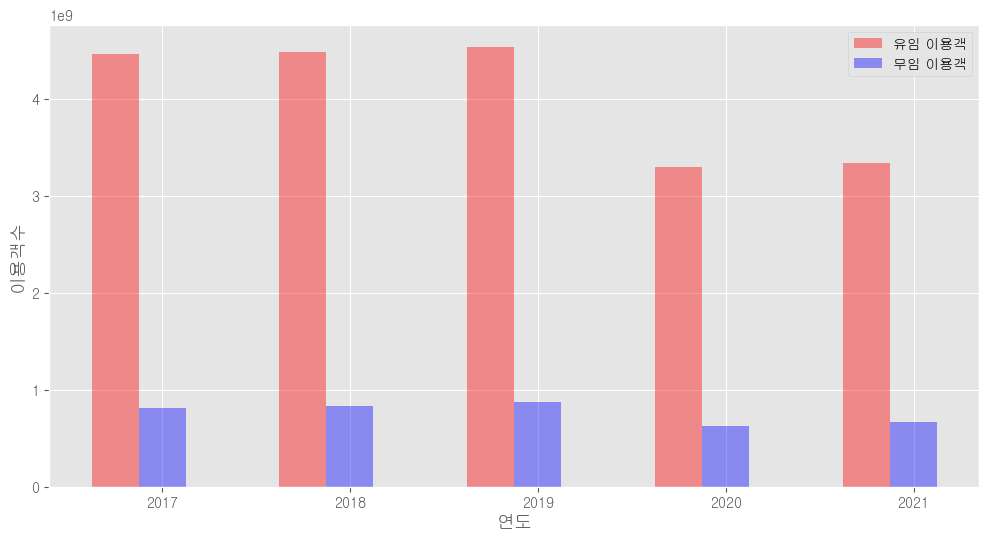

In [75]:
# 그림 사이즈, 바 굵기 조정
import numpy as np
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 5개이므로 0, 1, 2, 3, 4 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 2개 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df_fares_year['유임 이용객'], bar_width, alpha=0.4, color='red', label='유임 이용객')

b2 = plt.bar(index + bar_width, df_fares_year['무임 이용객'], bar_width, alpha=0.4, color='blue', label='무임 이용객')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 5 + bar_width, 1), df_fares_year['연도'])

# x축, y축 이름 및 범례 설정
plt.xlabel('연도', size = 13)
plt.ylabel('이용객수', size = 13)
plt.legend()
plt.show()

## 3. 시각화